In [34]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
## read file

df = pd.read_csv('Car_Price_data.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df = df.drop(columns = 'car_ID')

In [8]:
# Identify the data types of the features

numerical_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [9]:
# Group numerical features
numerical_data = df[numerical_features]
numerical_summary = numerical_data.describe()
print("Numerical Features Summary:")
print(numerical_summary)

# Group categorical features
categorical_data = df[categorical_features]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)

Numerical Features Summary:
        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    

#### Data Visualization

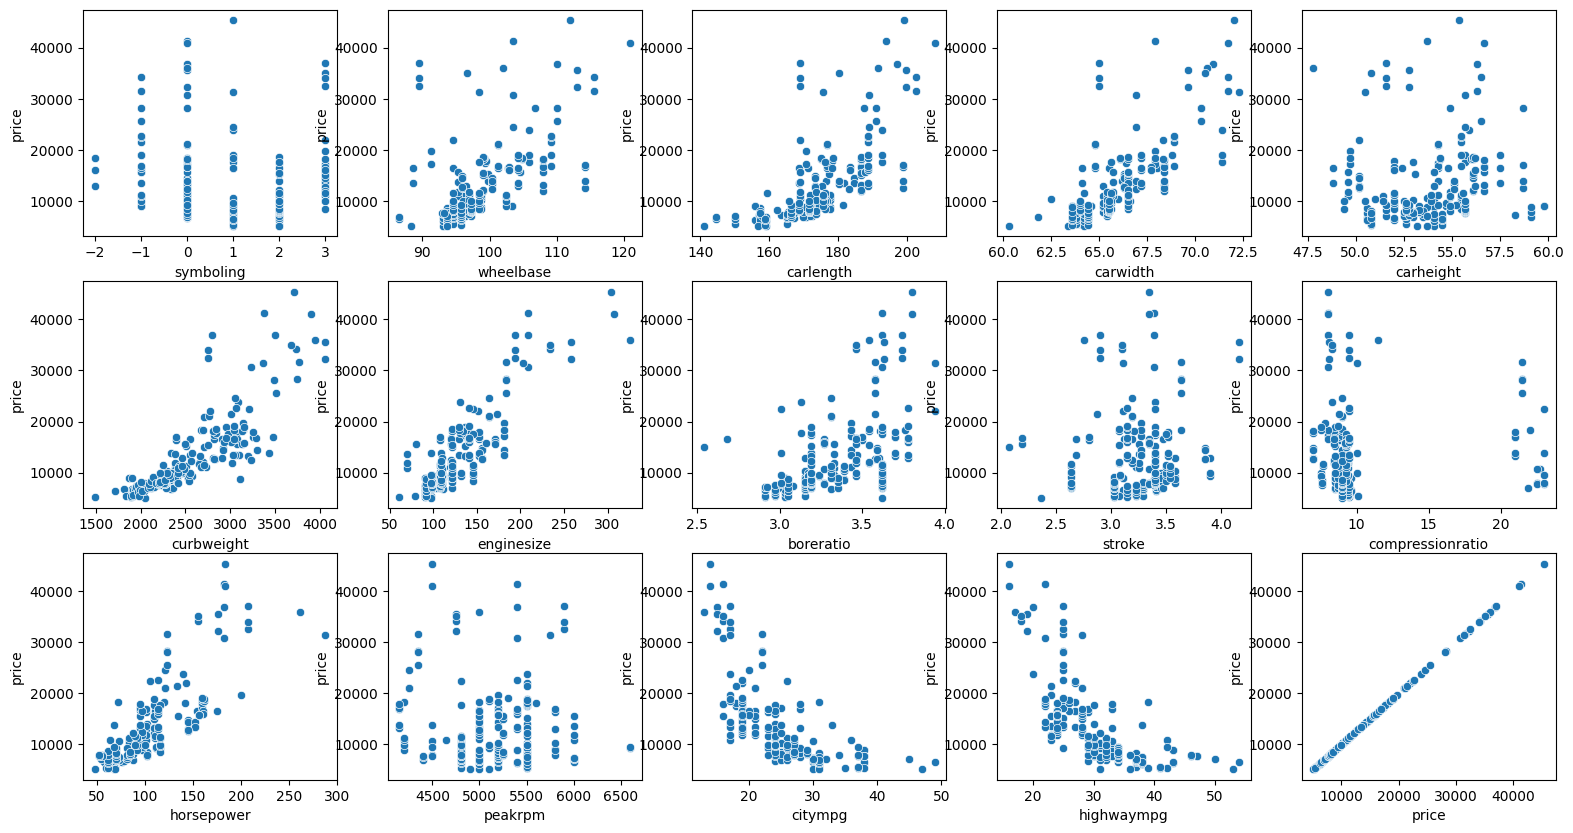

In [12]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(3, 5, figsize=(19, 10))

axs = axs.flatten()

# Iterate over the features and create scatter subplots
for i, feature in enumerate(numerical_data.columns):
    #print(i,feature)
    sns.scatterplot(data=df, x=feature, y='price', ax=axs[i])
    #axs[i].set_title(feature)


From the above plots:
wheelbase, carlength, carwidth, curbweight, enginesize, boneratio, horsepowercitympg, highwaympg are seen to be linearly relationship
with price

However, wheelbase, carlenght, boneration are seemed to be having outliers (plot box plot for confirmation)

and features like citympg & highwaympg seem to be having negative correlation with price.

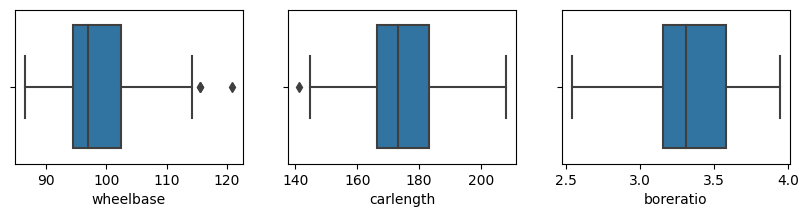

In [13]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 2))

axs = axs.flatten()

# Iterate over the features and create scatter subplots
for i, feature in enumerate(['wheelbase', 'carlength', 'boreratio']):
    #print(i,feature)
    sns.boxplot(data=df, x=feature, ax=axs[i])
    #axs[i].set_title(feature)
    #axs[i].set_ylabel(feature)


Wheelbase & carlength is having outlier but choosing to keep it & not remove it.

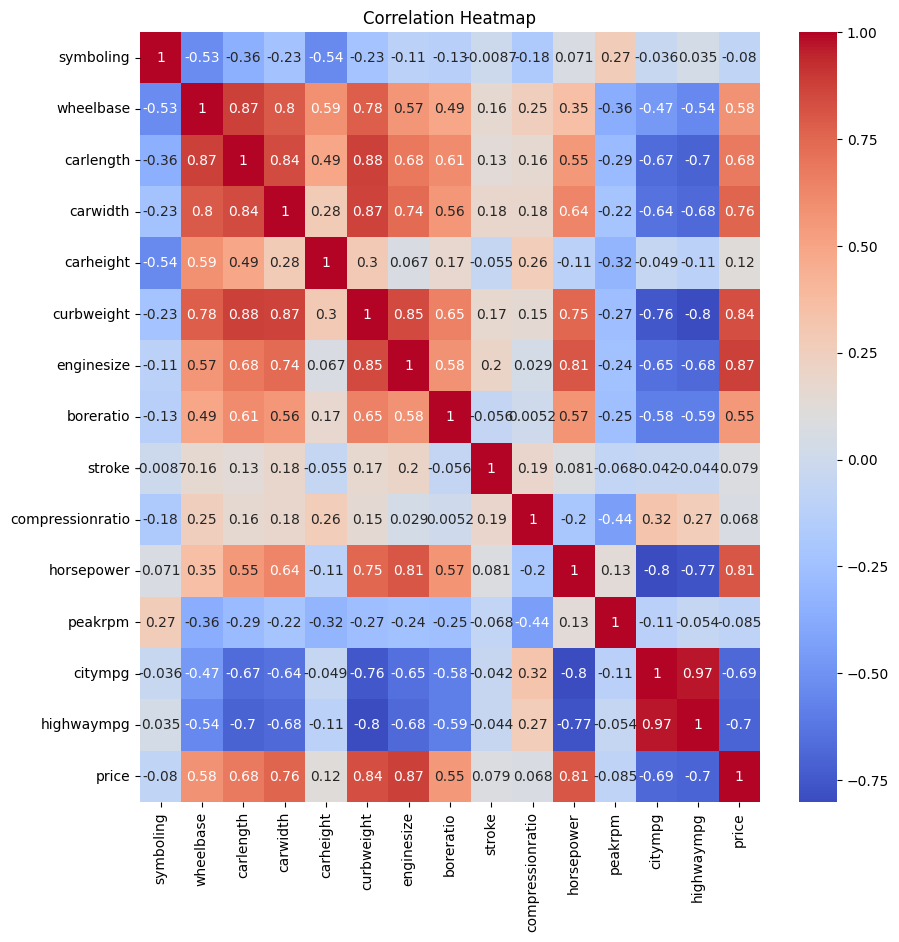

In [14]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Multi-collinearity features found:
    
    Highwaympg -- Carlength
    Enginesize -- Curbweight
    Curbweight -- Carlength
    Carlength -- Wheelbase
    Highwaympg -- Horsepower
    Curbweight -- Carwidth
    Enginesize -- Carwidth
    Carlength -- Highwaympg
    Curbweight -- Highwaympg
    Curbweight -- citympg

In [15]:
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Extract the correlation values with the target variable
correlation_with_target = corr_matrix['price'].abs()

# Sort the features by their correlation values
sorted_features = correlation_with_target.sort_values(ascending=False)

# Print the sorted features
print("Sorted features by correlation with target:")
print(sorted_features)

Sorted features by correlation with target:
price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64


In [18]:
numerical_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [19]:
continous_features = ['wheelbase', 'enginesize', 'boreratio',]

In [20]:
## After checking multi-collinearity, decided to go with the below features

df2 = df[['wheelbase', 'enginesize', 'boreratio','price']]

In [21]:
df2.head()

,wheelbase,enginesize,boreratio,price
0,88.6,130,3.47,13495.0
1,88.6,130,3.47,16500.0
2,94.5,152,2.68,16500.0
3,99.8,109,3.19,13950.0
4,99.4,136,3.19,17450.0


In [22]:
categorical_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


CarName is irrelevant for the price prediction, so drop it

In [23]:
categorical_data = categorical_data.drop(columns='CarName') ## drop 'CarName' column

In [24]:
print('Unique values of each features:\n')
for feature in categorical_data.columns:
    print(feature)
    print(categorical_data[feature].unique())

Unique values of each features:

fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [25]:
features_with_two_categories = ['fueltype','aspiration','doornumber','enginelocation']

# Apply one-hot encoding to multiple categorical features
encoded_df = pd.get_dummies(categorical_data, columns = features_with_two_categories)
encoded_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,convertible,rwd,dohc,four,mpfi,0,1,1,0,0,1,1,0
1,convertible,rwd,dohc,four,mpfi,0,1,1,0,0,1,1,0
2,hatchback,rwd,ohcv,six,mpfi,0,1,1,0,0,1,1,0
3,sedan,fwd,ohc,four,mpfi,0,1,1,0,1,0,1,0
4,sedan,4wd,ohc,five,mpfi,0,1,1,0,1,0,1,0


In [27]:
features_with_more_categories = ['carbody','drivewheel','enginetype','fuelsystem']

# Extract the categorical features from the DataFrame
cat_data = categorical_data[['cylindernumber']]

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the categorical data
encoder.fit(cat_data)

# Perform ordinal encoding on the categorical data
encoded_data = encoder.transform(cat_data)

# Create a new DataFrame with the encoded data
encoded_df_cylindernumber = pd.DataFrame(encoded_data, columns=['cylindernumber'])

# Print the encoded DataFrame
encoded_df['cylindernumber'] = encoded_df_cylindernumber['cylindernumber']
encoded_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,convertible,rwd,dohc,2.0,mpfi,0,1,1,0,0,1,1,0
1,convertible,rwd,dohc,2.0,mpfi,0,1,1,0,0,1,1,0
2,hatchback,rwd,ohcv,3.0,mpfi,0,1,1,0,0,1,1,0
3,sedan,fwd,ohc,2.0,mpfi,0,1,1,0,1,0,1,0
4,sedan,4wd,ohc,1.0,mpfi,0,1,1,0,1,0,1,0


In [29]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Perform label encoding on each categorical feature
for feature in features_with_more_categories:
    encoded_df[feature] = encoder.fit_transform(categorical_data[feature])

# Print the updated DataFrame
encoded_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,0,2,0,2.0,5,0,1,1,0,0,1,1,0
1,0,2,0,2.0,5,0,1,1,0,0,1,1,0
2,2,2,5,3.0,5,0,1,1,0,0,1,1,0
3,3,1,3,2.0,5,0,1,1,0,1,0,1,0
4,3,0,3,1.0,5,0,1,1,0,1,0,1,0


In [30]:
final_df = pd.concat([encoded_df,df2],axis = 1)
final_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear,wheelbase,enginesize,boreratio,price
0,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,13495.0
1,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,16500.0
2,2,2,5,3.0,5,0,1,1,0,0,1,1,0,94.5,152,2.68,16500.0
3,3,1,3,2.0,5,0,1,1,0,1,0,1,0,99.8,109,3.19,13950.0
4,3,0,3,1.0,5,0,1,1,0,1,0,1,0,99.4,136,3.19,17450.0


In [31]:
target = df2['price']

In [32]:
final_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear,wheelbase,enginesize,boreratio,price
0,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,13495.0
1,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,16500.0
2,2,2,5,3.0,5,0,1,1,0,0,1,1,0,94.5,152,2.68,16500.0
3,3,1,3,2.0,5,0,1,1,0,1,0,1,0,99.8,109,3.19,13950.0
4,3,0,3,1.0,5,0,1,1,0,1,0,1,0,99.4,136,3.19,17450.0


In [36]:
## Split training & testing data
X = final_df.drop(columns = 'price')
Y = final_df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 23)

# Running linear Regression on train data
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)


# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 12352295.218466705
R^2 Score: 0.8651319070605362
